In [1]:
import pandas as pd
import glob
import os
import concurrent.futures

# Load all .tsv files (e.g. assuming GDC data files are in multiple folders)
file_list = glob.glob('data/**/*.tsv', recursive=True)

def process_file(file):
    folder_name = os.path.basename(os.path.dirname(file)) # Extract folder name
    raw = pd.read_csv(file, sep='\t', skiprows=[0] + list(range(2, 6)))
    df = raw[raw['gene_type'] == 'protein_coding']
    fpkm_df = df[['gene_name', 'fpkm_unstranded']] # Extract the required columns
    fpkm_df = fpkm_df.set_index('gene_name') # Set 'gene_name' as index
    fpkm_df = fpkm_df.rename(columns={'fpkm_unstranded': folder_name}) # Change column name
    return fpkm_df
# Use ThreadPoolExecutor for parallel processing
with concurrent.futures.ThreadPoolExecutor() as executor:
    fpkm_list = list(executor.map(process_file, file_list))
    combined_df = pd.concat(fpkm_list, axis=1)
combined_df

,0344d3bb-8bb2-459e-bc1f-ba31c7470d08,03680aea-84a2-4775-bb9c-24f8c5907247,05fa4573-6ca5-40dc-a48b-ec847b7c58ad,0869efb9-b167-45af-8b2c-67433e39baad,09fb135f-1c19-45d6-ae31-a8c32a0e06bf,0b73f593-b6e8-4897-9b9b-f09e65e436b7,0c09a94d-8885-49fb-91c1-aa0ebf52386a,0d1f21df-73b3-4dd0-9ad4-fd5c7a5d2424,0f37f5ba-3582-4c61-8c70-bf9b0ede6e71,119e7a6c-7fd1-4a2d-bfdc-35cb13d39414,...,ed3bcbbc-0f04-415f-a083-e34cefa9e310,efb3bf8d-7d14-42d6-8845-e81af909d47f,f2dbb2df-c98b-42d1-9fad-9708bc42fa03,f700b996-2ccf-4f59-9249-da7f087054ba,f7d58012-79f4-440f-add6-8a00728e96ba,f8cee5c6-bfd7-439d-8ba7-20ee2dfa5d68,f90939c7-6e24-4aa5-8c34-c1fc1b79e485,fb60fc57-836c-42e1-bc96-042b82d1a878,fc757476-1d31-470b-b648-79608b201bdc,fd52d8a9-e044-4f17-861a-9780752b20ee
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,11.6817,22.6036,21.8919,13.2263,10.9738,4.7897,6.2520,9.4454,11.2880,15.1943,...,19.1370,4.2029,15.2397,5.7462,5.9697,7.6593,17.5934,5.4310,11.9640,13.8247
TNMD,0.0000,0.0000,0.0349,0.0000,0.0447,2.3792,0.0000,0.0688,0.0000,0.0000,...,0.0243,0.0236,0.0000,0.0114,0.0315,0.0090,0.0405,0.0000,0.0252,0.0163
DPM1,32.1803,21.2812,24.4960,46.7501,35.6924,24.9881,24.7710,20.6503,29.4658,29.2407,...,48.0346,20.8098,30.6934,21.8321,55.2587,18.3161,23.6511,25.5127,28.6092,36.8708
SCYL3,2.6562,2.1952,2.2431,2.3444,1.7301,2.6558,2.3100,1.5230,2.6244,3.1801,...,4.2403,2.0369,2.4132,2.3882,3.2525,1.6561,2.3733,2.0868,2.4571,3.1978
C1orf112,1.5169,2.1774,0.5302,0.5406,0.3260,1.0610,0.9227,0.3614,1.1403,1.3238,...,2.4924,0.4254,0.8365,0.4095,2.1628,0.3828,0.8609,1.2825,1.4071,2.0613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL451106.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
AC008763.4,0.0000,0.0000,0.0065,0.0000,0.0000,0.0000,0.0000,0.0000,0.0113,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100,0.0000,0.0000,0.0060
AC006486.3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [2]:
g = pd.read_csv("./gdc_sample_sheet.tsv", index_col=0, sep='\t')

data = combined_df
#data = norm.loc[~norm.index.duplicated(keep='first')]
Cont = ["Solid Tissue Normal"]
Test = ["Primary Tumor"]
g

,Type
File ID,
0869efb9-b167-45af-8b2c-67433e39baad,Primary Tumor
bbb426a9-806b-4417-a3cd-4dd1b0c87792,Solid Tissue Normal
e6e83fd4-2f80-44e1-8dce-588a37308dbb,Solid Tissue Normal
3f474548-c7b2-4d5e-9f8d-03c800a094fe,Solid Tissue Normal
b6d704be-2e8f-40cc-9c09-ffde6be5c814,Solid Tissue Normal
...,...
656fd74d-49d8-40a5-8eb9-dac0fbe4ea2d,Primary Tumor
12272d02-341e-43a2-aa23-7232a8dde730,Primary Tumor
7abd9747-a947-4b15-b51c-c82cda9f065c,Primary Tumor


In [15]:
#데이터 필터링
low_expression_counts = (data.iloc[:, 1:] <= 1).sum(axis=1)
filtered_data = data[low_expression_counts < 6]
norm = filtered_data + 1
norm

,0344d3bb-8bb2-459e-bc1f-ba31c7470d08,03680aea-84a2-4775-bb9c-24f8c5907247,05fa4573-6ca5-40dc-a48b-ec847b7c58ad,0869efb9-b167-45af-8b2c-67433e39baad,09fb135f-1c19-45d6-ae31-a8c32a0e06bf,0b73f593-b6e8-4897-9b9b-f09e65e436b7,0c09a94d-8885-49fb-91c1-aa0ebf52386a,0d1f21df-73b3-4dd0-9ad4-fd5c7a5d2424,0f37f5ba-3582-4c61-8c70-bf9b0ede6e71,119e7a6c-7fd1-4a2d-bfdc-35cb13d39414,...,ed3bcbbc-0f04-415f-a083-e34cefa9e310,efb3bf8d-7d14-42d6-8845-e81af909d47f,f2dbb2df-c98b-42d1-9fad-9708bc42fa03,f700b996-2ccf-4f59-9249-da7f087054ba,f7d58012-79f4-440f-add6-8a00728e96ba,f8cee5c6-bfd7-439d-8ba7-20ee2dfa5d68,f90939c7-6e24-4aa5-8c34-c1fc1b79e485,fb60fc57-836c-42e1-bc96-042b82d1a878,fc757476-1d31-470b-b648-79608b201bdc,fd52d8a9-e044-4f17-861a-9780752b20ee
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,12.6817,23.6036,22.8919,14.2263,11.9738,5.7897,7.2520,10.4454,12.2880,16.1943,...,20.1370,5.2029,16.2397,6.7462,6.9697,8.6593,18.5934,6.4310,12.9640,14.8247
DPM1,33.1803,22.2812,25.4960,47.7501,36.6924,25.9881,25.7710,21.6503,30.4658,30.2407,...,49.0346,21.8098,31.6934,22.8321,56.2587,19.3161,24.6511,26.5127,29.6092,37.8708
SCYL3,3.6562,3.1952,3.2431,3.3444,2.7301,3.6558,3.3100,2.5230,3.6244,4.1801,...,5.2403,3.0369,3.4132,3.3882,4.2525,2.6561,3.3733,3.0868,3.4571,4.1978
FGR,12.8249,3.6381,12.5956,4.6965,18.0103,9.1805,14.2714,16.8955,16.3124,4.0127,...,5.0287,16.7896,13.6715,21.5633,4.4059,40.0796,13.3991,39.8905,15.5736,3.9978
CFH,23.5457,32.3920,29.9314,5.2997,19.5602,11.2652,11.0766,17.5045,26.4260,10.9621,...,11.8824,18.4772,14.3526,9.5417,89.7315,17.8936,23.1179,6.9284,18.2251,25.1844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MRM1,6.4699,6.6470,4.9879,8.6848,2.6323,7.2283,8.8347,2.5182,8.2202,7.3411,...,8.0385,2.4188,4.0255,3.1452,2.7427,3.3480,7.8678,5.4615,5.9722,9.4463
MRPL45,16.9288,36.1168,17.2792,20.8169,27.2694,14.0775,21.6234,19.5746,23.2560,25.2816,...,23.5988,13.6987,18.2496,14.5746,24.1415,14.2234,25.9013,18.7744,22.1156,29.1802
PAGR1,2.7626,2.0525,3.4311,3.4554,2.2091,3.9058,3.5208,2.4152,3.1226,3.9101,...,3.2768,2.2931,3.1718,2.5101,4.2371,2.2278,2.9283,2.3067,2.5927,2.9208


In [34]:
from scipy.stats import ttest_ind
import numpy as np
C = norm[g[g['Type'].isin(Cont)].index]
T = norm[g[g['Type'].isin(Test)].index]
df = norm[[]].copy() # 인덱스 복사해서 데이터프레임 만들기
df["P"] = ttest_ind(C, T, equal_var = False, axis = 1)[1]
df = df.fillna(0.9999999) #NA가 있다면 1로 처리

mean = np.divide(T.mean(axis = 1), C.mean(axis = 1)) #산술평균용
df["logFC"] = np.log2(mean) #fold change 계산
# 유의미한 값 계산
pv = 1.5
df['significant'] = np.logical_and(
    np.abs(df['logFC']) >= pv, 
    df['P'] <= 0.05,
)
table = df[df['significant']]
Sig = table.index
Sig_up = table[table['logFC'] > 0].index
Sig_down = table[table['logFC'] < 0].index
table.to_csv("significant.csv")
table

,P,logFC,significant
gene_name,,,
GCLC,1.379705e-04,2.020844,True
DBNDD1,7.929452e-20,1.926465,True
PDK4,2.909847e-09,-2.043826,True
PRSS22,3.232763e-15,1.924631,True
GGCT,2.426536e-11,1.765796,True
...,...,...,...
C4orf48,1.606860e-11,1.756851,True
SELENOP,5.178673e-26,-1.669354,True
SLC22A31,3.146808e-11,1.534507,True


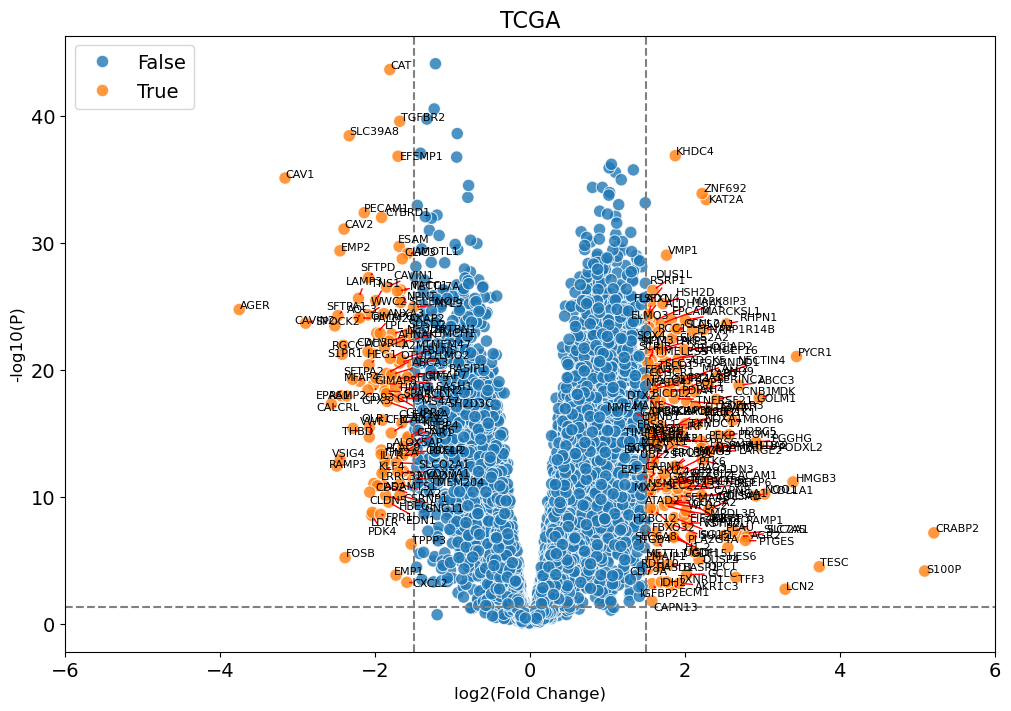

In [35]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
# 그래프 생성
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='logFC', y=-np.log10(df['P']),
                     hue='significant', data=df, s=80, alpha=0.8)
plt.xlim(-6, 6)
plt.axhline(-np.log10(0.05), c='gray', ls='dashed') 
plt.axvline(pv, ls='dashed', color='gray')            
plt.axvline(-pv, ls='dashed', color='gray')           
plt.xlabel('log2(Fold Change)', fontsize=12)
plt.ylabel('-log10(P)', fontsize=12)
plt.legend(loc='upper left', fontsize=14)
plt.title('TCGA', fontsize=16)
plt.tick_params(labelsize=14)

# 유의미한 결과 가진 인덱스에 표시 추가
texts = []
for i, row in df[df['significant']].iterrows():
    texts.append(ax.text(row['logFC'], -np.log10(row['P']), i, fontsize=8))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
plt.savefig("Volcano_plot.pdf")
plt.show()


In [36]:
#유저 데이터
df2 = pd.read_excel(
    'null vs wt-ox.xlsx',   # File name
    header=9,               # The 9th row (index 8) will be used as header
    index_col=0             # The 1st column (index 0) will be used as index
)
df2_replaced = df2[~(df2 == 0).all(axis=1)]
norm2 = df2_replaced + 1
norm2

/home/yumin/miniforge3/envs/stroke/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/home/yumin/miniforge3/envs/stroke/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


,normal,lung cancer
Gene Symbol,,
A1BG,1.349135,1.271965
A1CF,1.005982,1.093358
A2M,1.043379,1.000000
A3GALT2,1.079778,1.000000
A4GALT,7.676520,6.960520
...,...,...
ZXDC,14.262900,14.863200
ZYG11A,1.043075,1.012345
ZYG11B,14.787400,12.102900


In [37]:
FC2 = np.divide(norm2['lung cancer'], norm2['normal'])
sig2 = norm2[[]].copy() # 인덱스 복사해서 데이터프레임 만들기
sig2["logFC"] = np.log2(FC2) #fold change 계산

sig2['significant'] = np.abs(sig2['logFC']) >= pv

sig2_all = sig2.index[np.abs(sig2['logFC']) >= pv]
sig2_up = sig2.index[sig2['logFC'] >= pv] 
sig2_down = sig2.index[sig2['logFC'] <= -pv]

sig2[sig2['significant']].to_csv("User_sig.csv")
sig2[sig2['significant']]

,logFC,significant
Gene Symbol,,
ABCA12,2.096566,True
ABCC2,-1.606591,True
AC007906.2,2.022003,True
ACAA2,-1.502232,True
ACER2,1.743775,True
...,...,...
WFDC3,2.002592,True
WNT9A,1.680963,True
ZBED2,3.351534,True


In [38]:
# 각 데이터프레임의 인덱스를 집합(set)으로 변환
set_Sig = set(Sig)
set_Sig_up = set(Sig_up)
set_Sig_down = set(Sig_down)

set_sig2_all = set(sig2_all)
set_sig2_up = set(sig2_up)
set_sig2_down = set(sig2_down)

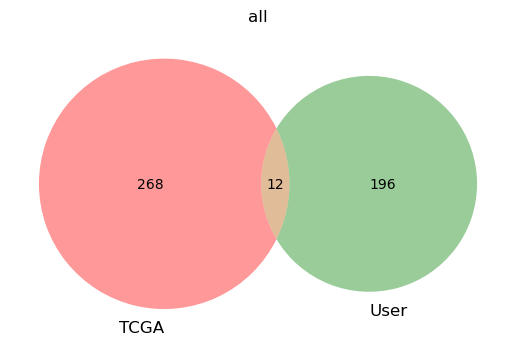

In [41]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# 벤 다이어그램 그리기 
venn2([set_Sig, set_sig2_all], ('TCGA', 'User'))
plt.title('all')
plt.savefig('Venn Diagram_all.pdf')
plt.show()
